### Notebook for Supplementary Figure Comparison
This notebook was used to generate the panels in Figure 3 from: 

**metapredict: a fast, accurate, and easy-to-use cross-platform predictor of consensus disorder**
<br>Ryan J. Emenecker, Daniel Griffith, and Alex S. Holehouse



In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)


In [2]:
import protfasta
import metapredict as meta

## Read in the data 
Code below reads in the data which in turn was obtained from the MobiDB server using the following syntax in the API request:

    # PGL-3
    https://mobidb.bio.unipd.it/api/download?acc=G5EBV6&format=fasta

    # velo 1
    https://mobidb.bio.unipd.it/api/download?acc=Q7T226&format=fasta

    # sup35 (Pombe)
    https://mobidb.bio.unipd.it/api/download?acc=O74718&format=fasta

    # E1A (Human adenovirus C serotype 5)
    https://mobidb.bio.unipd.it/api/download?acc=P03255&format=fasta
    
Once downloaded, the `.fasta` were moved into this directory and re-named.

In [37]:
filenames = ['velo1','e1a','pgl3','sup35']

raw = {}
seqs = {}
consensus = {}
metapredict = {}

for f in filenames:
    
    # read in fasta file in an unconstrained way
    raw[f] = protfasta.read_fasta('data/%s_disorder.fasta'%(f), invalid_sequence_action='ignore')
    
    # get amino acid sequences based on fact protein sequence is always first in the FASTA
    # file
    seqs[f] = raw[f][list(raw[f].keys())[0]]
    
    # extract out each predicted disorder string of 1s and 0 and convert into an integer
    # list
    local_disorder = []
    for i in raw[f]:
        if i.split('|')[1].find('prediction-disorder') > -1:
            local_disorder.append([int(x) for x in raw[f][i]])

    # calculate consensus disorder as the mean of the 1s and 0s from all predictors across
    # the positions
    consensus[f]  = np.mean(np.array(local_disorder),0)
    
    # computer disorder in metapredict
    metapredict[f] = meta.predict_disorder(seqs[f])

            
        



In [38]:
spot2disorder = {}
with open('data/spot2_disorder_data.tsv','r') as fh:
    content = fh.readlines()
    
for line in content[0:3]:
    line = line.strip()
    print(len(line))
    if len(line) == 0:
        pass
    name = line.split()[0]
    d2 =  line.split()[1]
    print(name)
    spot2disorder[name] = [int(x) for x in d2]
    

293
e1a
698
pgl3
668
sup35


array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

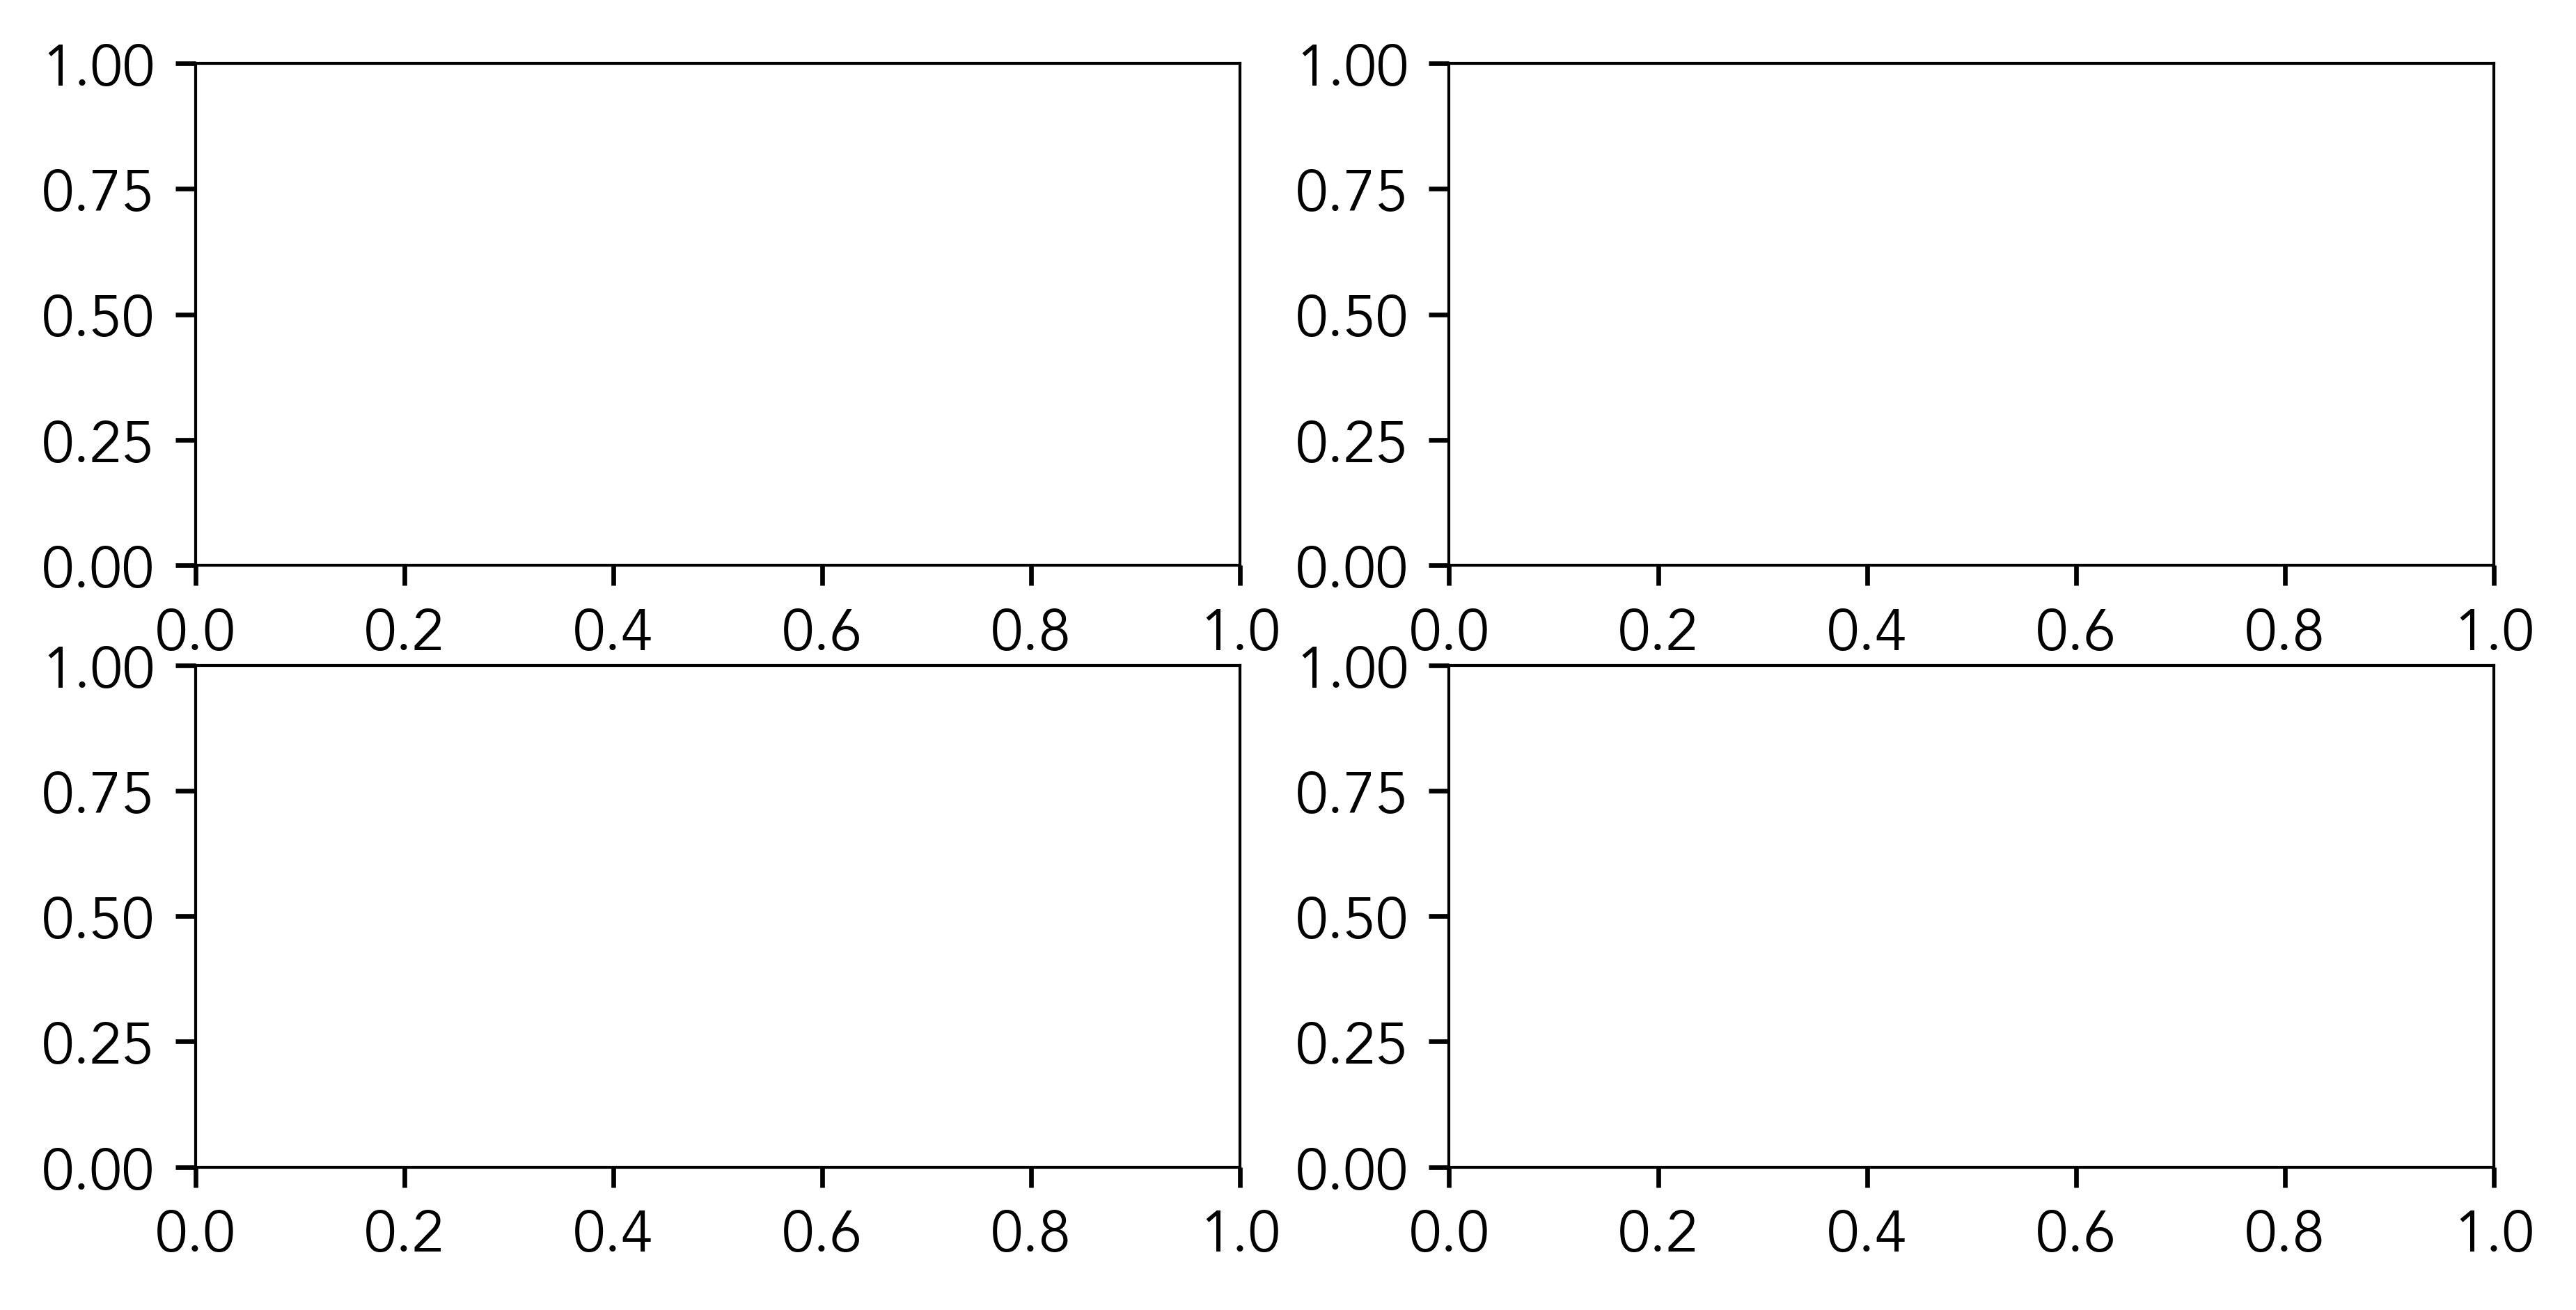

In [50]:
fig, axs = plt.subplots(2, 2, figsize=(7.1,3.5), dpi=300)



In [53]:
axs[0][0]

<AxesSubplot:>

[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]
ay


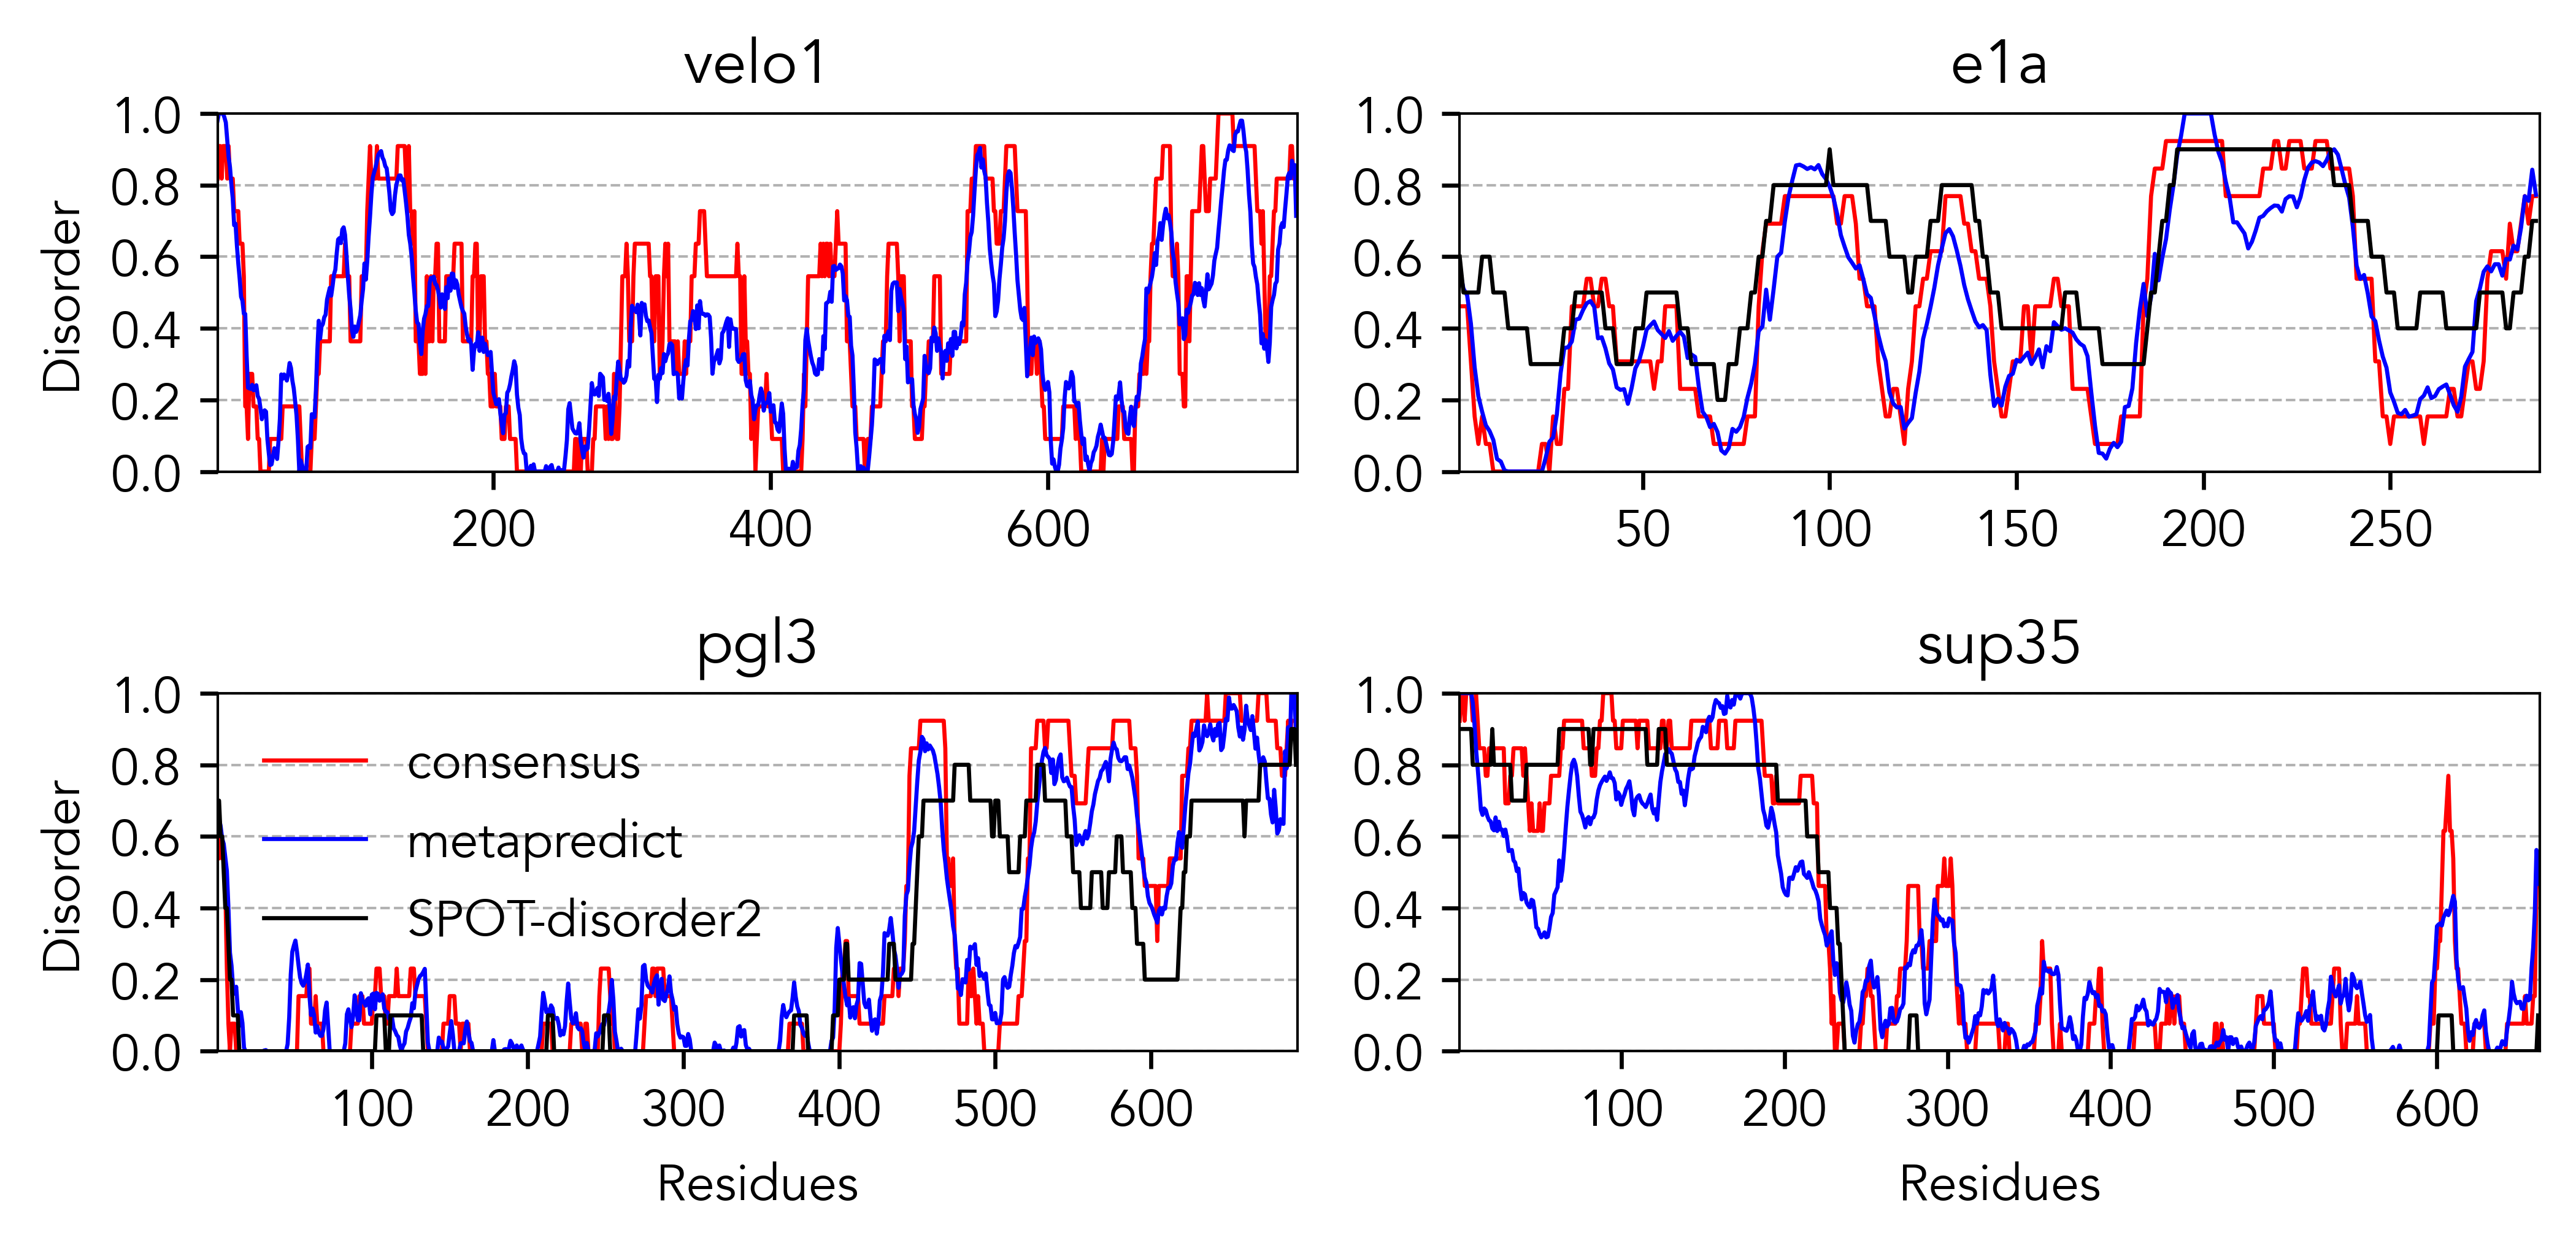

In [79]:
fig, axs = plt.subplots(2, 2, figsize=(7.1,3.5), dpi=300)

axs = [axs[0][0], axs[0][1], axs[1][0], axs[1][1]]

print(axs)
idx=0
for f in filenames:
    
    ax = axs[idx]
    idx = idx +1
    
    local_seq = seqs[f]
    residues = np.arange(1,len(local_seq)+1)
    
    ax.plot(residues, consensus[f], 'r', linewidth=0.8, label='consensus')
    ax.plot(residues, metapredict[f], '-b', linewidth=0.8, label='metapredict')
    
    try:
        ax.plot(residues, np.array(spot2disorder[f])*0.1, '-k', linewidth=0.8, label='SPOT-disorder2')
    except KeyError:
        print('ay')
        pass


    
    ax.set_ylim([0,1])
    ax.set_xlim([1,len(local_seq)+1])
    ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0])
    ax.grid(color='k',which='major', linestyle='--',linewidth=0.5, alpha=0.3, axis='y')
    

    
    #ax.ylabel('Disorder')
    #plt.xlabel('Residue')
    ax.set_title(f)
    
    if idx == 1:
        ax.set_ylabel('Disorder')

    if idx == 3:
        ax.set_ylabel('Disorder')

    if idx == 3:
        ax.legend(frameon=False)
        ax.set_xlabel('Residues')
    
    if idx == 4:
        ax.set_xlabel('Residues')

plt.tight_layout()
plt.savefig('combined_figure_si.pdf')
plt.savefig('combined_figure_si.png', dpi=300)



In [91]:
a='networks/meta_predict_disorder_100e_v1.pt'

In [92]:
".".join(a.split('_')[-1].split('.')[:-1])

'v1'